## Plotting with Seaborn

_Portions of the following content can also be found by following the tutorials found in the `seaborn` documentation._

In the previous notebook, we showed a simple example of plotting using `matplotlib` to demonstrate figuring embedding using magic commands. In this notebook, we will demonstrate plotting using [`seaborn`](https://seaborn.pydata.org/), a Python data visualization library based on `matplotlib`. This package allows for the creation of attractive and informative graphics. First, lets import the `seaborn` library!

In [1]:
import seaborn as sns

While not necessary, it is a good idea to have defaults set up for your plots so that settings do not to be changed for each plot. The following lines of code sets font types and sizes, as well as colors using `rcParams` from `matplotlib`.

Additionally, the context of the plot can be set for different situations/publications (eg. `talks`, `posters`, `paper`, `notebook`). 

Finally, the style of the plot can be changed as well (`white`, `dark`, `whitegrid`, `darkgrid`, `ticks`).

_Note: While the settings are set separately in the cell below, they can be conbined into a single command._

In [2]:
import matplotlib.pyplot as plt

# Color friendly color cycle - gist.github.com/thriveth/8560036
cb_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

sns.set(style="ticks", context="talk", rc={"image.cmap":"Set2",
                                             "axes.prop_cycle": plt.cycler(color=cb_color_cycle),
                                             "font.sans-serif": "Liberation Sans",
                                             "font.monospace": "Liberation Sans",
                                             "axes.titlesize": 16,
                                             "axes.titleweight": "bold",
                                             "axes.labelsize": 14,
                                             "axes.labelweight": "bold",
                                             "xtick.labelsize": 12,
                                             "ytick.labelsize": 12,
                                             "legend.fontsize": 12})

### Scatter Plots

Before we plot our first `seaborn` plot, lets first load the `tips` dataset and take a look!

In [3]:
tips = sns.load_dataset("tips")

print(type(tips))

tips.head()

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can see here, the data is stored as a `pandas` DataFrame object. Briefly, `pandas` is a data analysis library for python. The `head` function prints the first few lines from our DataFrame. From our tips example, we can see the DataFrame stores the following information for each observation: `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, `size`

Next, we will use seaborn to plot the relationship between the total bill and the tip left! To do so, we will use the `relplot` function, and setting `kind` to `satter` for scatter plot. This can be changed for other plots. Not all types of plots can be plotted this way though, so check the documentation to see what and how to plot each type of plot (eg. barplot)

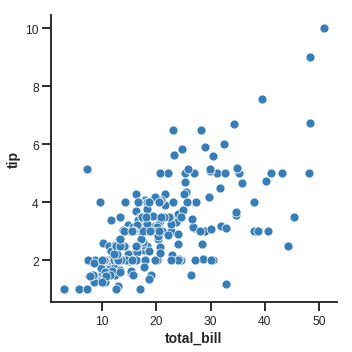

In [4]:
%matplotlib inline

sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

We can add an additional dimension (by colouring the observations by another variable) to the 2D plot. This is referred to "hue semantic" in `seaborn`. Try to sort the above plot, separated by whether the group sat in a smoking or non-smoking area. _(Hint: Use the key "hue" to specify an additional dimension)_

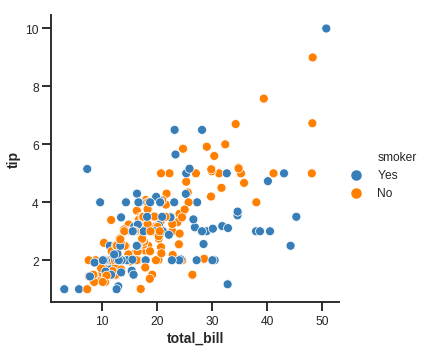

In [5]:
%matplotlib inline

sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, kind="scatter")

### Showing Multiple Relationships

We can also show multiple relationships in our plots using multiple axes and subplots. For example, we can split the above plot by time using the key `col`.

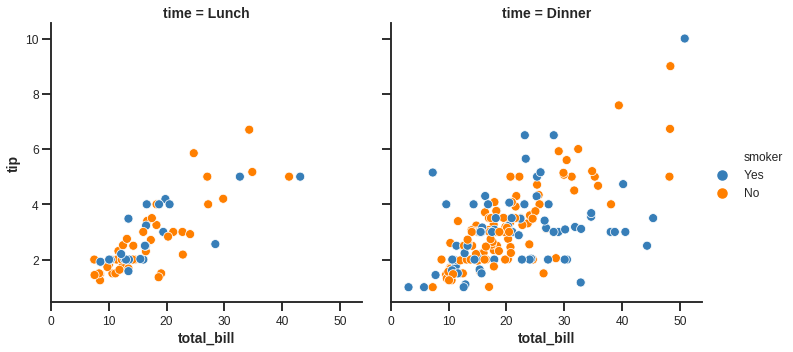

In [6]:
%matplotlib inline

sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

### Lineplot

Next, lets load the `fmri` dataset and take a look at the first few rows of data.

In [7]:
fmri = sns.load_dataset("fmri")

fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Try plotting this as a line plot using `seaborn`, visualizing the signal over time! By default, the confidence interval will also be shown (done via bootstrapping, which can be time intensive for large-datasets). The confidence interval can be turned off by setting the `ci` setting to `None`. As this dataset is not particularly large, try plotting it both ways! 

Additionally, the `ci` setting can be used to plot the standard deviation instead using `ci="sd"`.

/home/tkai/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


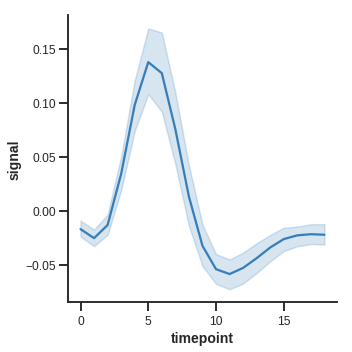

In [8]:
%matplotlib inline 

sns.relplot(x="timepoint", y="signal", data=fmri, kind="line")

We can also plot subsets with semantic mappings, similar to how we split the scatter plots. 

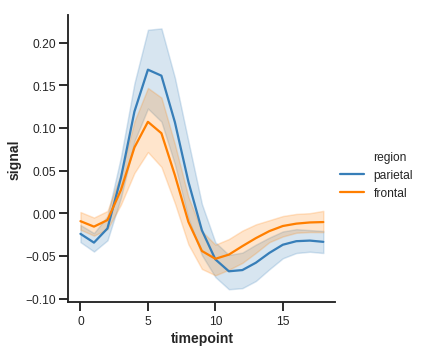

In [9]:
%matplotlib inline 

sns.relplot(x="timepoint", y="signal", hue="region", data=fmri, kind="line")

### Saving Figures

Using python, it is possible to save a figure using either a vectorized or non-vectorized (`jpg`, `gif`) format. It is recommended to save your figures using a vectorized format, such as `svg` and perform additional figure processing using programs such as Inkscape. While Python is able to generate informative figures, it is best to use a program such as Inkscape to put combine and create multi-panel figures.

To save a figure, use matplotlib's `savefig` function. Let's try it with the figure we just created!

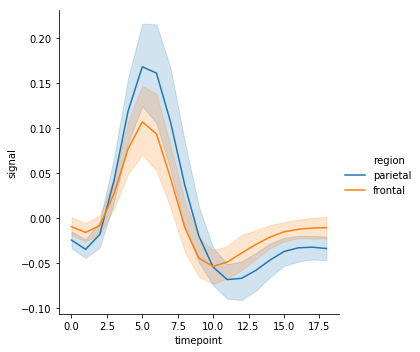

In [4]:
sns.relplot(x="timepoint", y="signal", hue="region", data=fmri, kind="line")

filename = './jupyer_seaborn.svg'
plt.savefig(filename)

### Conclusion

This notebook only shows two simple ways of plotting using `seaborn`. There are many others (eg. boxplot, violinplot, etc). In order to learn how to use seaborn, it is best to explore it using your own data and refer back to the documentation! 